<a href="https://colab.research.google.com/github/lmj900830/NLP_TermProject_Group20_Kor/blob/master/nsmc_combined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import re
!pip install konlpy
from konlpy.tag import Okt

from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 92kB 8.4MB/s 
     |████████████████████████████████| 3.6MB 45.9MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
train_data = pd.read_table('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
test_data = pd.read_table('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

In [ ]:
print('훈련용 리뷰 개수 :',len(train_data)) 

훈련용 리뷰 개수 : 150000


In [ ]:
train_data

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [ ]:
test_data

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [ ]:
train_data['document'].nunique(), train_data['label'].nunique()

(146182, 2)

In [ ]:
print('총 샘플의 수 :',len(train_data))

총 샘플의 수 : 150000


In [ ]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0  75173
1      1  74827


In [ ]:
print(train_data.isnull().values.any())

True


In [ ]:
print(train_data.isnull().sum())

id          0
document    5
label       0
dtype: int64


In [ ]:
train_data.loc[train_data.document.isnull()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


In [ ]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [ ]:
print(len(train_data))

149995


In [ ]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣?! ]","")
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣?! ]","")
# 한글과 공백을 제외하고 모두 제거

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train_data

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지 소는 뭔죄인가,0
149996,8549745,평점이 너무 낮아서,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉방황과 우울했던 날들의 자화상,1


In [ ]:
test_data

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,,0
2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따,0
49997,9072549,그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화 재미도 없고 기분만 잡치고 한 세트장에서 다 해먹네,0


In [ ]:
train_data['document'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())


test_data['document'].replace('', np.nan, inplace=True)
print(test_data.isnull().sum())

id            0
document    717
label         0
dtype: int64
id            0
document    243
label         0
dtype: int64


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
train_data.loc[train_data.document.isnull()][:]

,id,document,label
584,7117896,NaN,0
593,6478189,NaN,0
638,9364602,NaN,0
668,1600635,NaN,0
1058,5890638,NaN,0
...,...,...,...
149216,1218435,NaN,1
149358,6780491,NaN,0
149718,7690797,NaN,1
149862,7175749,NaN,0


In [ ]:
test_data.loc[test_data.document.isnull()][:]

,id,document,label
1,9274899,NaN,0
116,6910486,NaN,1
254,4976468,NaN,0
468,7517102,NaN,0
504,2096424,NaN,0
...,...,...,...
48862,9665591,NaN,0
48972,2205310,NaN,0
49413,9027358,NaN,1
49871,9767991,NaN,0


In [ ]:
train_data = train_data.dropna(how = 'any')
print(len(train_data))

149278


In [ ]:
test_data = test_data.dropna(how = 'any')
print(len(test_data))

49757


In [ ]:
train_data.drop_duplicates(subset=['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_data.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train_data = train_data.dropna(how = 'any')
print(len(train_data))

144166


In [ ]:
test_data = test_data.dropna(how = 'any')
print(len(test_data))

48575


In [ ]:
url = "https://raw.githubusercontent.com/GyungHoonWon/COSE461/master/stopwords.txt"
file = urllib.request.urlopen(url)

for line in file:
	decoded_line = line.decode("utf-8")
	print(decoded_line)
 
stopwords = decoded_line.split(', ')
stopwords.remove('')
stopwords

가량, 가지, 각, 간, 갖은, 개국, 개년, 개소, 개월, 걔, 거, 거기, 거리, 건, 것, 겨를, 격, 겸, 고, 군, 군데, 권, 그, 그거, 그것, 그곳, 그까짓, 그네, 그녀, 그대, 그래, 그래도, 그서, 그러나, 그러니, 그러니까, 그러다가, 그러면, 그러면서, 그러므로, 그러자, 그런, 그런데, 그럼, 그렇지만, 그루, 그리고, 그리하여, 그분, 그이, 그쪽, 근, 근데, 글쎄, 글쎄요, 기, 김, 나, 나위, 남짓, 내, 냥, 너, 너희, 네, 녀석, 년, 년대, 년도, 누구, 니, 다른, 다만, 단, 달, 달러, 당신, 대, 대로, 더구나, 더욱이, 데, 도, 동, 되, 두, 두세, 두어, 둥, 듯, 듯이, 등, 등등, 등지, 따라서, 따름, 따위, 딴, 때문, 또, 또는, 또한, 리, 마당, 마련, 마리, 만, 만큼, 말, 매, 맨, 명, 몇, 몇몇, 모, 모금, 모든, 무렵, 무슨, 무엇, 뭐, 뭣, 미터, 및, 바, 바람, 바퀴, 박, 발, 발짝, 번, 벌, 법, 별, 본, 부, 분, 뻔, 뿐, 살, 새, 서너, 석, 설, 섬, 세, 세기, 셈, 쇤네, 수, 순, 스무, 승, 시, 시간, 식, 씨, 아, 아냐, 아니, 아니야, 아무, 아무개, 아무런, 아아, 아이, 아이고, 아이구, 야, 약, 양, 얘, 어, 어느, 어디, 어머, 언제, 에이, 엔, 여기, 여느, 여러, 여러분, 여보, 여보세요, 여지, 역시, 예, 옛, 오, 오랜, 오히려, 온, 온갖, 올, 왜냐하면, 왠, 외, 요, 우리, 원, 월, 웬, 위, 음, 응, 이, 이거, 이것, 이곳, 이래, 이런, 이런저런, 이른바, 이리하여, 이쪽, 일, 일대, 자, 자기, 자네, 장, 저, 저것, 저기, 저쪽, 저편, 저희, 적, 전, 점, 제, 조, 주, 주년, 주일, 줄, 중, 즈음, 즉, 지, 지경, 지난, 집, 짝, 쪽, 쯤, 차, 참, 채, 척, 첫, 체, 초, 총, 측, 치, 큰, 킬로미터, 타, 터, 턱, 톤, 통, 투, 판, 퍼센트, 편, 평, 푼, 하기야, 하긴, 

['가량',
 '가지',
 '각',
 '간',
 '갖은',
 '개국',
 '개년',
 '개소',
 '개월',
 '걔',
 '거',
 '거기',
 '거리',
 '건',
 '것',
 '겨를',
 '격',
 '겸',
 '고',
 '군',
 '군데',
 '권',
 '그',
 '그거',
 '그것',
 '그곳',
 '그까짓',
 '그네',
 '그녀',
 '그대',
 '그래',
 '그래도',
 '그서',
 '그러나',
 '그러니',
 '그러니까',
 '그러다가',
 '그러면',
 '그러면서',
 '그러므로',
 '그러자',
 '그런',
 '그런데',
 '그럼',
 '그렇지만',
 '그루',
 '그리고',
 '그리하여',
 '그분',
 '그이',
 '그쪽',
 '근',
 '근데',
 '글쎄',
 '글쎄요',
 '기',
 '김',
 '나',
 '나위',
 '남짓',
 '내',
 '냥',
 '너',
 '너희',
 '네',
 '녀석',
 '년',
 '년대',
 '년도',
 '누구',
 '니',
 '다른',
 '다만',
 '단',
 '달',
 '달러',
 '당신',
 '대',
 '대로',
 '더구나',
 '더욱이',
 '데',
 '도',
 '동',
 '되',
 '두',
 '두세',
 '두어',
 '둥',
 '듯',
 '듯이',
 '등',
 '등등',
 '등지',
 '따라서',
 '따름',
 '따위',
 '딴',
 '때문',
 '또',
 '또는',
 '또한',
 '리',
 '마당',
 '마련',
 '마리',
 '만',
 '만큼',
 '말',
 '매',
 '맨',
 '명',
 '몇',
 '몇몇',
 '모',
 '모금',
 '모든',
 '무렵',
 '무슨',
 '무엇',
 '뭐',
 '뭣',
 '미터',
 '및',
 '바',
 '바람',
 '바퀴',
 '박',
 '발',
 '발짝',
 '번',
 '벌',
 '법',
 '별',
 '본',
 '부',
 '분',
 '뻔',
 '뿐',
 '살',
 '새',
 '서너',
 '석',
 '설',
 '섬',
 '세',
 '세기',
 '셈',
 '쇤네'

In [ ]:
okt = Okt()

X_train = []
for sentence in train_data['document']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)
    
    
X_test = []
for sentence in test_data['document']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

In [ ]:
print(X_train[:100])

[['더빙', '진짜', '짜증나다', '목소리'], ['흠', '포스터', '보고', '초딩', '영화', '오버', '연기', '조차', '가볍다', '않다'], ['무재', '밓었', '다그', '래서', '보다', '추천', '다'], ['교도소', '이야기', '구먼', '솔직하다', '재미', '없다', '평점', '조정'], ['사이', '몬페', '익살스럽다', '연기', '돋보이다', '영화', '!', '스파이더맨', '에서', '늙다', '보이다', '하다', '커스틴', '던스트', '너무나도', '이쁘다', '보이다'], ['막', '걸음', '마', '떼다', '부터', '초등학교', '학년', '생인', '살다', '영화', 'ㅋㅋㅋ', '반개', '아깝다', '움'], ['원작', '긴장감', '제대로', '살리다', '하다'], ['반개', '아깝다', '욕', '나오다', '이응경', '길용우', '연', '생활', '인지', '정말', '로', '해도', '보단', '낫다', '납치', '감금', '반복', '반복', '드라마', '가족', '없다', '연기', '못', '하다', '사람', '엿'], ['액션', '없다', '재미', '있다', '안되다', '영화'], ['왜케', '평점', '낮다', '?', '꽤', '볼', '헐리우드', '화려하다', '너무', '길들이다', '있다', '?'], ['걍', '인피니트', '짱', '이다', '진짜', '짱', '이다'], ['볼때', '마다', '눈물나다', '죽다', '향수', '자극', '!!', '허진호', '감성', '절제', '멜로', '달인', '이다'], ['울면', '서', '손', '들', '횡단보도', '건너다', '때', '뛰다', '치다', '이범수', '연기', '드럽다', '못', '하다'], ['담백하다', '깔끔하다', '좋다', '신', '문', '로만', '보다', '보다', '자꾸', '잊어버리다', '들', '사람', '이다'], [

In [ ]:
print(X_test[:100])

[['굳다', 'ㅋ'], ['평점', '들', '나쁘다', '않다', '짜다', '더', '더욱', '아니다'], ['지루하다', '않다', '완전', '막장', '임', '돈', '주다', '보기', '에는'], ['아니다', '다섯', '개', '주다', '왜', '로', '나오다', '심기', '불편하다', '하다', '??'], ['음악', '주가', '되다', '최고', '음악', '영화'], ['진정하다', '쓰레기'], ['마치', '미국', '애니', '에서', '튀어나오다', '창의력', '없다', '로봇', '디자인', '부터가', '고개', '젖다', '하다'], ['갈수록', '개판', '되다', '중국영화', '유치하다', '내용', '없다', '폼', '잡다', '끝나다', '안되다', '무기', '유치하다', '남무', '그리다', '동사서독', '같다', '영화', '이건', '류', '류작', '이다'], ['이별', '아픔', '뒤', '찾아오다', '새롭다', '인연', '기쁨', '사람', '그렇다', '않다'], ['괜찮다', '포켓몬스터', '잼밌'], ['한국', '독립영화', '한계', '그렇게', '아버지', '되다', '비교', '되다'], ['청춘', '아름답다', '아름답다', '움', '이성', '흔들다', '놓다', '찰나', '아름답다', '움', '자다', '포착', '섬세하다', '아름답다', '수채화', '같다', '퀴어', '영화', '이다'], ['눈', '보이다', '반전', '이다', '영화', '흡인', '력', '사라지다', '않다'], ['스토리', '연출', '연기', '비주', '얼', '영화', '기본', '조차', '안되다', '영화', '해', '이렇다', '영화', '찍다', '김문옥', '감독', '영화', '경력', '인데', '조무래기', '들', '영화', '평론', '하다', '?', '같다', '마인드', '빠지다', '?'], ['소위', 'ㅈ', '문', '가라'

In [ ]:
len(X_test), len(X_train)

(48575, 144166)

In [ ]:
len(train_data), len(test_data)

(150000, 50000)

In [ ]:
train_data

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [ ]:
test_data

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
print(tokenizer.word_index)

{'영화': 1, '보다': 2, '하다': 3, '들': 4, '없다': 5, '이다': 6, '있다': 7, '?': 8, '좋다': 9, '너무': 10, '다': 11, '정말': 12, '!': 13, '되다': 14, '재밌다': 15, '같다': 16, '진짜': 17, '로': 18, '아니다': 19, '않다': 20, '에서': 21, '만들다': 22, '과': 23, '나오다': 24, '연기': 25, '평점': 26, '최고': 27, '안': 28, '인': 29, '스토리': 30, '생각': 31, '못': 32, '왜': 33, '드라마': 34, '게': 35, '사람': 36, '감동': 37, '보고': 38, '이렇다': 39, '아깝다': 40, '더': 41, '배우': 42, '때': 43, 'ㅋㅋ': 44, '!!': 45, '와': 46, '감독': 47, '그냥': 48, '재미있다': 49, '재미': 50, '내용': 51, '까지': 52, '주다': 53, '좀': 54, '자다': 55, '하고': 56, '지루하다': 57, '재미없다': 58, '쓰레기': 59, '가다': 60, '모르다': 61, '들다': 62, '그렇다': 63, '싶다': 64, '작품': 65, '사랑': 66, '알다': 67, '하나': 68, '다시': 69, '마지막': 70, '볼': 71, '잘': 72, '정도': 73, '이건': 74, '완전': 75, '오다': 76, 'ㅋ': 77, 'ㅠㅠ': 78, '많다': 79, '처음': 80, 'ㅋㅋㅋ': 81, '장면': 82, '액션': 83, '주인공': 84, '이렇게': 85, '안되다': 86, '걸': 87, '차다': 88, '나다': 89, '개': 90, '돈': 91, '하': 92, '지금': 93, '이야기': 94, '최악': 95, '넘다': 96, '느낌': 97, '임': 98, '연출': 99, '라': 100, 'ㅡㅡ': 10

In [ ]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 43564
등장 빈도가 2번 이하인 희귀 단어의 수: 24356
단어 집합에서 희귀 단어의 비율: 55.90854834266826
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.003366575705838


In [ ]:
vocab_size = total_cnt - rare_cnt + 1 # 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거. 0번 패딩 토큰을 고려하여 +1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 19209


In [ ]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[:3])

[[395, 17, 221, 580], [833, 396, 38, 527, 1, 1316, 25, 848, 594, 20], [2281, 2210, 5475, 2, 185, 11]]


In [ ]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [ ]:
# 빈 샘플 제거

In [ ]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
drop_test = [index for index, sentence in enumerate(X_test) if len(sentence) < 1]

In [ ]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

143840
149674


In [ ]:
X_test = np.delete(X_test, drop_test, axis=0)
y_test = np.delete(y_test, drop_test, axis=0)
print(len(X_test))
print(len(y_test))

48419
49844


In [ ]:
#패딩

리뷰의 최대 길이 : 67
리뷰의 평균 길이 : 10.191281979977752


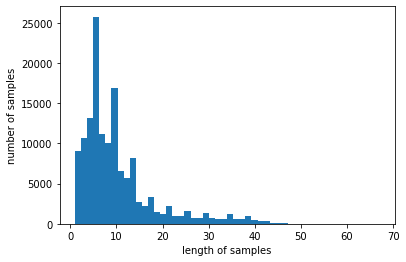

In [ ]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [ ]:
max_len = 25
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 25 이하인 샘플의 비율: 92.71760289210233


In [ ]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [ ]:
# LSTM 분류

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

In [ ]:
# model = Sequential([
#   Embedding(20000, 300, input_length=25), 
#   LSTM(units=5, dropout = 0.5), 
#   Dense(2, activation='softmax')
# ])

# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 64)                640064    
_________________________________________________________________
dense_32 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 65        
Total params: 644,289
Trainable params: 644,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)
history = model.fit(X_train, y_train, epochs=10, batch_size=512)

ValueError: ignored

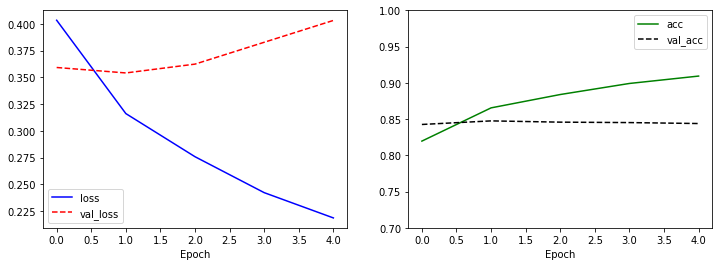

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], 'g-', label='acc')
plt.plot(history.history['val_acc'], 'k--', label='val_acc')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [ ]:
sub_data = pd.read_csv('https://raw.githubusercontent.com/GyungHoonWon/COSE461/master/ko_data.csv')

In [ ]:
sub_data

,Id,Sentence
0,0,정말 많이 울었던 영화입니다.
1,1,시간 낭비예요.
2,2,포스터를 저렇게밖에 만들지 못했던 제작자의 소심함에 침을 뱉고 싶다.
3,3,지금 봐도 재미있는 영화!!! 코믹과 감동!!! 그리고 요리!!!
4,4,이걸 영화로 만드는 거야?얼마나 가는지 보자.
...,...,...
11182,11182,이 영화를 커플에게 추천합니다. 영화관에 가다보면 평생 잊지 못할 추억이 하나 생길...
11183,11183,심심__ 그냥 한효주 cf
11184,11184,공감해서 눈물나는 영화. 안 보신분들이 전부 제가 울었다고 하면 의아해하실텐데 보면...
11185,11185,오토바이 신은 최고네요.


In [ ]:
okt = Okt()

z_test = []
for sentence in sub_data['Sentence']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    z_test.append(temp_X)



In [ ]:
z_test

[['정말', '많이', '울다', '영화', '이다', '.'],
 ['낭비', '예요', '.'],
 ['포스터', '저렇게', '밖에', '만들다', '못', '하다', '제작자', '소심하다', '침', '뱉다', '싶다', '.'],
 ['지금', '보다', '재미있다', '영화', '!!!', '코믹', '과', '감동', '!!!', '요리', '!!!'],
 ['걸', '영화로', '만들다', '거야', '?', '얼마나', '가다', '보다', '.'],
 ['잔잔하다', '감동', '주다', '영화', '좋다', '영화', '다', '.', '줄리', '안', '무어', '매력', '!'],
 ['프랑스', '영화', ',', '정말', '재미없다', '밖에', '...'],
 ['이보', '다', '더', '자연스럽다', '없다', '.'],
 ['잠', '자고', '있다', '~~'],
 ['오프닝', '씬', '...', '(', '영화', '와', '젊음', '대해', '하다', '.)'],
 ['내용', '재미있다', '~', '유덕화', '가장', '멋지다', '나오다', '영화', '들', '~'],
 ['영화', '없다', '색깔', '있다'],
 ['홍성', '진', '영화', '해설', '님', '우뢰매', '욕', '하다', '...'],
 ['게', '뭐라다', '...'],
 ['우울하다', '작가', '주의', '인'],
 ['재밌다', '...'],
 ['최고', '...', '녹화', '찍다', '걸', '볼', '있다', '정말', '다행', '이야', '..'],
 ['보다', '동감', '많이', '해', '.', '보다', '남', '일이', '아니다', '같다', '.', '수고', '하다'],
 ['강', '.'],
 ['오오', '~', '정말', '좋아하다', '!!'],
 ['진', '얼굴', '짱', '몸짱', '!!', '정말', '이쁘다', '!'],
 ['감동', '과', '함께', '감성'

In [ ]:
z_test = tokenizer.texts_to_sequences(z_test)

In [ ]:
z_test

[[12, 109, 282, 1, 6],
 [592, 880],
 [396, 992, 251, 22, 32, 3, 2466, 7026, 3028, 5195, 64],
 [93, 2, 49, 1, 104, 401, 23, 37, 104, 1852, 104],
 [87, 308, 22, 3404, 8, 404, 60, 2],
 [260, 37, 53, 1, 9, 1, 11, 3506, 28, 2574, 161, 13],
 [753, 1, 12, 58, 251],
 [1624, 11, 41, 1494, 5],
 [737, 2066, 7],
 [2206, 483, 1, 46, 3431, 421, 3],
 [51, 49, 1991, 156, 177, 24, 1, 4],
 [1, 5, 3061, 7],
 [8581, 499, 1, 4625, 147, 2013, 287, 3],
 [35, 798],
 [1104, 256, 915, 29],
 [15],
 [27, 3606, 197, 87, 71, 7, 12, 891, 361],
 [2, 3150, 109, 368, 2, 351, 783, 19, 16, 1658, 3],
 [990],
 [3665, 12, 105, 45],
 [499, 453, 135, 12731, 45, 12, 214, 13],
 [37, 23, 409, 529, 778, 3, 1345],
 [572, 23, 1263, 1057, 6823, 1, 11],
 [9189, 1000],
 [359, 373, 3, 167],
 [519, 2, 57, 600, 46, 4676, 83],
 [24, 109, 53],
 [38, 813, 54, 4122],
 [76],
 [28, 211, 13, 5620, 988, 3, 19, 8, 3540, 1765, 999],
 [445, 1, 115, 3, 10, 726, 30, 46, 980],
 [2825, 367, 27, 408, 6],
 [66, 329, 677, 91, 367, 45, 32, 2113, 127, 2, 18

In [ ]:
z_test = pad_sequences(z_test, maxlen = max_len)

In [ ]:
model.predict(z_test)

array([[0.01416032, 0.9858396 ],
       [0.9950819 , 0.00491807],
       [0.61154956, 0.38845047],
       ...,
       [0.04464788, 0.9553521 ],
       [0.03446051, 0.96553946],
       [0.6102867 , 0.38971326]], dtype=float32)

In [ ]:
preds_classes = np.argmax(model.predict(z_test), axis=-1)

In [ ]:
preds_classes

array([1, 0, 0, ..., 1, 1, 0])

In [ ]:
len(preds_classes)

11187

In [ ]:
import csv
import numpy as np

with open('outputFile.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    for row in range(0,preds_classes.shape[0]):
        myList = []
        myList.append(preds_classes[row])
        writer.writerow(myList)